In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0, 100, size=100)
X[:,1] = 0.75 * X[:, 0] + 3 + np.random.normal(0, 10, size=100)

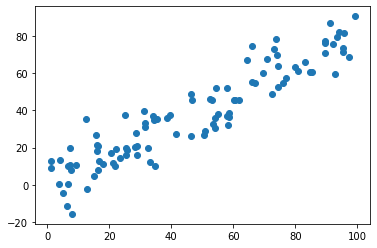

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
pca = PCA(n_components=1)
pca.fit(X)
pca

PCA(n_components=1)

In [5]:
pca.components_

array([[0.76205992, 0.64750651]])

In [6]:
X_reduction = pca.transform(X)

In [7]:
X_restore = pca.inverse_transform(X_reduction)

In [8]:
X_restore[:, 0]

array([ 51.72518142,  58.40055395,  71.48247977,  92.46266453,
        96.8462396 ,  25.02915824,  72.12441262,  19.06379953,
        90.74295699,  38.42423183,   4.95295897,  21.22634869,
         7.355804  ,  25.70399857,  57.98455566,  48.18762184,
        27.44565796,  21.5772395 ,   5.86970169,  38.53649104,
        78.52494726,  60.14756886,  25.97793937,  20.77746419,
        54.39815561,  79.91647154,  79.43389264,  42.62245719,
        51.89242834,  14.95252414,  54.07085144,  53.0258563 ,
        35.48522861,  25.72159194,  19.14267554,  41.04429752,
        47.43428013,  75.95102828,  54.12689581,  18.71589073,
        84.35700158,  23.3187121 ,  91.84165881,  88.08569779,
        91.3843878 ,   8.01997441,  67.08041618,   9.42296267,
       103.26927894,  40.76858538,  50.0942329 ,  -1.2023762 ,
        31.17422739,  10.34009102,   3.45057854,  33.99799579,
        12.10454566,  44.72024463,  50.55721665,  -2.12500757,
        74.12921877,  34.4970035 ,  39.10876546,   9.72

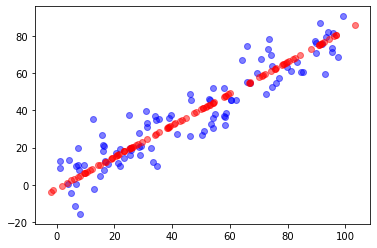

In [10]:
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_restore[:, 0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

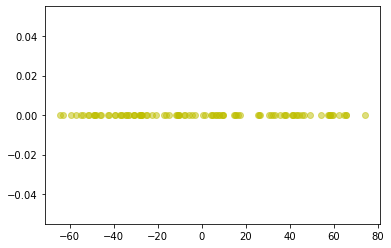

In [11]:
plt.scatter(X_reduction[:, 0], np.zeros(100), color='y', alpha=0.5)
plt.show()

In [16]:
digists = datasets.load_digits()
digists_X = digists.data
digists_y = digists.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(digists_X, digists_y, random_state=666)

In [24]:
X_train.shape

(1347, 64)

In [25]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [29]:
d_pca_2 = PCA(n_components=2)
d_pca_2.fit(X_train)
X_train_reduction_2 = d_pca_2.transform(X_train)
X_test_reduction_2 = d_pca_2.transform(X_test)

In [30]:
knn_clf_2 = KNeighborsClassifier()
knn_clf_2.fit(X_train_reduction_2, y_train)
knn_clf_2.score(X_test_reduction_2, y_test)

0.6066666666666667

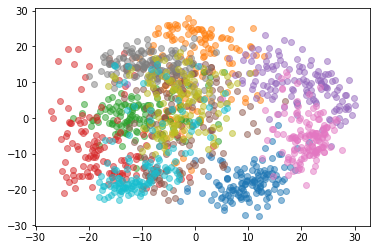

In [31]:
for i in range(10):
    plt.scatter(X_train_reduction_2[y_train==i, 0],X_train_reduction_2[y_train==i, 1], alpha=0.5)

In [34]:
d_pca_auto = PCA(0.95)
d_pca_auto.fit(X_train)
X_train_reduction_auto = d_pca_auto.transform(X_train)
X_test_reduction_auto = d_pca_auto.transform(X_test)

0.95

In [40]:
d_pca_auto.components_.shape[0]

28

In [41]:
knn_clf_auto = KNeighborsClassifier()
knn_clf_auto.fit(X_train_reduction_auto, y_train)
knn_clf_auto.score(X_test_reduction_auto, y_test)

0.98